In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from laspy.file import File

from sklearn import preprocessing

from pathlib import Path
%matplotlib inline

In [2]:
file_root_path = Path("/Users/ethanchen/The University of Melbourne/Trent Penman - Sites")

file_root_path
las_format_folder = file_root_path / 'las_format'

from os import listdir
from os.path import isfile, join
mypath = "/Users/ethanchen/The University of Melbourne/Trent Penman - Sites/las_format"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith('las')]
onlyfiles

['SP01.las',
 '94 seaview.las',
 'SP03_Stony.las',
 'carpark.las',
 '126_Wye.las',
 '60 Bambra aireys.las',
 '184 Big Hill.las',
 'SP13_Garvey.las',
 '119 Dunse.las',
 '95 seaview.las',
 'SP04_Gentle_Annie_Creek.las',
 '85 Seaview.las',
 'SP09_Coalmine_ck.las',
 'SP06_Gentle_Annie.las',
 'SP08 Bambra Aireys nearIronbark.las',
 '84ish seaview.las',
 'SP10_Moggs_Creek.las',
 'SP12_Stony.las',
 '118 Dunse.las',
 'SP11_Seaview_extra.las',
 '104 sharps.las',
 '101 sharps.las',
 'SP02 Big Hill.las',
 'SP08_Bambra_Aireys_nearIronbark.las',
 'SP14_Garvey.las']

In [3]:
def makeDf(file_location_las):
    """
    file_location_las: Path to the las file.
    return:
        pandas data frame with features
            x ,y ,z ( in meters )
            r ,g ,b
    """
    inFile = File(file_location_las, mode='r')
    df_las = pd.DataFrame(columns = ["X", "Y", "Z", "Red", "Green", "Blue"])
    df_las['X'] = inFile.get_x_scaled()
    df_las['Y'] = inFile.get_y_scaled()
    df_las['Z'] = inFile.get_z_scaled()
    df_las['Green'] = inFile.green/256
    df_las['Red'] = inFile.red/256
    df_las['Blue'] = inFile.blue/256
#     print("Length of dataset:", df_las.shape[0])


    return df_las


file_of_interest =  'SP01.las'

file_location = las_format_folder/file_of_interest
print(file_location)


/Users/ethanchen/The University of Melbourne/Trent Penman - Sites/las_format/SP01.las


In [4]:
df = makeDf(file_location)
print(df.shape)
df.head()

(12942655, 6)


,X,Y,Z,Red,Green,Blue
0,-43.174969,-141.262482,93.278107,36.0,18.0,18.0
1,-43.047100,-141.366089,93.254890,45.0,29.0,29.0
2,-43.199471,-141.331238,93.451752,71.0,55.0,56.0
3,-37.695473,-143.821197,94.002754,50.0,35.0,36.0
4,-37.692371,-143.816879,94.209038,60.0,41.0,43.0


### Check the boundary of data.

In [5]:




print("X: min : {} meters   max {} meters ".format(df['X'].min() , df['X'].max()))
print("Y: min : {} meters   max {} meters ".format(df['Y'].min() , df['Y'].max()))
print("Z: min : {} meters   max {} meters ".format(df['Z'].min() , df['Z'].max()))
# print(df['Z'].max())



X: min : -145.534454489357 meters   max 153.668594280732 meters 
Y: min : -158.40856926556 meters   max 136.21093754056 meters 
Z: min : 83.664756746465 meters   max 305.477813752406 meters 


### Filter out the points that outside the a given diameter from the center point.

In [36]:
DIAMETER_OF_INTEREST = 10

D = DIAMETER_OF_INTEREST
df_filtered = df[(df['X'] <= D) & (df['X'] >= -D) & (df['Y'] <= D) & (df['Y'] >= -D)]

print("Adter filterd out points outside the diameter of {} meters.\n".format(DIAMETER_OF_INTEREST))

print("Filtered df shape : {}\n".format(df_filtered.shape))

print("Percentage of points remain : {}\n".format(df_filtered.shape[0] / df.shape[0]))

df_filtered.head()

Adter filterd out points outside the diameter of 10 meters.

Filtered df shape : (6115088, 6)

Percentage of points remain : 0.4724755469414892



,X,Y,Z,Red,Green,Blue
213547,-9.865475,-9.945294,152.118134,63.0,58.0,62.0
213549,-9.899123,-9.979225,152.123566,56.0,50.0,52.0
213550,-9.964568,-9.901691,152.144562,55.0,45.0,47.0
213552,-9.909722,-9.893228,152.138275,56.0,50.0,55.0
213555,-9.791768,-9.800784,152.160690,57.0,51.0,57.0


In [37]:
def points_within_diameters(df , diameter ):
    """
    df: Data frame want to filter out the rows.
    diameter:
        diameter from the center point (in meter)
    
    return:
        a duplicate data frame.
        usage df = points_with_diameters(df, diameter) to overwrite the existing object to pontentially 
        save memory usage.

    """
    
    

    df_filtered = df[(df['X'] <= diameter) & (df['X'] >= -diameter) & (df['Y'] <= diameter) & (df['Y'] >= -diameter)]
    return df_filtered


assert(points_within_diameters(df , DIAMETER_OF_INTEREST).shape == df_filtered.shape)


### Picking the range of cross section. (Z axis). 

### Should probably use the z.min as the reference point , and then we pick the offest to this reference point.

In [38]:
z_min = df_filtered['Z'].min()

print("The reference level is {} meter ".format(z_min))
# Picking the range of cross section. (Z axis).
CROSS_SECTION_MIN = 4 + z_min
CROSS_SECTION_MAX = 6 + z_min

The reference level is 150.779571467393 meter 


In [39]:

df_z_filtered = df_filtered[(df_filtered['Z'] >= CROSS_SECTION_MIN) & 
                            (df_filtered['Z'] <= CROSS_SECTION_MAX)]

print("Shape after filtered by height = {} \n".format(df_z_filtered.shape))

print("Percentage of points remain : {}\n".format(df_z_filtered.shape[0] / df.shape[0]))

Shape after filtered by height = (1771276, 6) 

Percentage of points remain : 0.13685569150997226



In [40]:
def filter_by_high_rage(df , z_min = CROSS_SECTION_MIN, z_max = CROSS_SECTION_MAX):
    """
    df: Data frame want to filter out the rows.
    z_min and z_max:
        range of high intereseted.
    
    return:
        a duplicate data frame.
        usage df = points_with_diameters(df, diameter) to overwrite the existing object to pontentially 
        save memory usage.
    """
    
    df_z_filtered = df_filtered[(df_filtered['Z'] >= z_min) & 
                            (df_filtered['Z'] <= z_max)]
    return df_z_filtered



In [41]:
#2d pllotting
def plot_2d(df):
    fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(df['X'].values, df['Y'].values,c = df[['Red','Green','Blue']].values/255.0, s= 1.0)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    
    

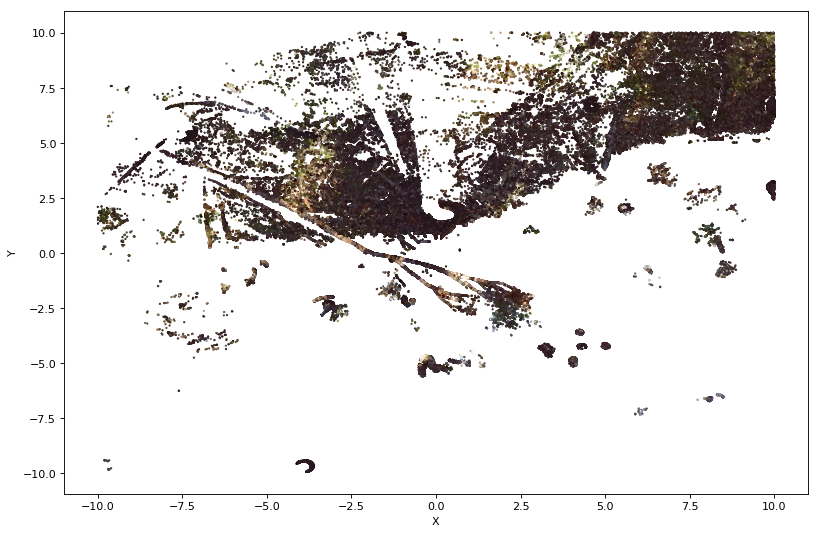

In [49]:
SIZE_USED = 0.6

SIZE = int(df_z_filtered.shape[0] * SIZE_USED)

# df_z_filtered.sample(SIZE)

plot_2d(df_z_filtered.sample(SIZE))
# plot_2d(df_z_filtered)

### Now we can compare the above 2D result with the 3D view from pptk

In [47]:

import pptk
def plot_pptk(df):
    v = pptk.viewer(df[['X', 'Y', 'Z']])
    v.attributes(df[['Red', 'Green', 'Blue']] / 255.)
    v.set(point_size=0.001)
    
    


In [48]:
plot_pptk(df_z_filtered)